In [24]:
import pandas as pd
import glob
import os
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import pixiedust

In [25]:
#Read prediction results and order them alphabetically. Hence they are ordered by aspect.
def create_pred_table(measure):
    path = '/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/GO_Term_Prediction/result_data/results'

    first = False
    index=['MF_High_Normal','CC_Low_Specific','BP_High_Shallow','MF_High_Shallow','MF_Middle_Normal','BP_Low_Shallow',
           'CC_Middle_Shallow','CC_Low_Shallow','BP_High_Normal','BP_High_Specific','MF_Middle_Shallow',\
           'CC_High_Normal','CC_Middle_Specific','MF_Middle_Specific','MF_Low_Shallow','BP_Low_Normal',\
           'CC_Middle_Normal','BP_Middle_Shallow','CC_High_Shallow','BP_Middle_Normal','MF_Low_Normal',\
           'BP_Low_Specific','BP_Middle_Specific','MF_Low_Specific','CC_Low_Normal']
    go_pred_table = pd.DataFrame()
    go_pred_table["index_col"] = index

    pd.set_option('display.max_colwidth', -1)
    pd.options.display.max_rows = 4000

    for filename in sorted(glob.glob(os.path.join(path, '*_5cv_mean.tsv'))):
        #print(filename)
        col_name = filename.split("/")[-1].split("_")[0].upper()
        tmp_column = pd.read_csv(filename,sep="\t")
        tmp_column[measure]
        go_pred_table[col_name] = tmp_column[measure]

    #go_pred_table.rename(index=index, inplace=True)
    go_pred_table.set_index('index_col', inplace=True)
    go_pred_table.sort_index(inplace=True)
    return go_pred_table


In [26]:
# Slice dataframe by aspect and order subgroups
def get_go_pred_table_for_aspect(aspect,go_pred_table):
    if aspect == "BP":
        go_pred_tableBP = go_pred_table[0:9]
        new_index =  ["BP_High_Shallow", "BP_High_Normal", "BP_High_Specific",\
                      "BP_Middle_Shallow","BP_Middle_Normal","BP_Middle_Specific",\
                      "BP_Low_Shallow","BP_Low_Normal","BP_Low_Specific"]
        go_pred_tableBP = go_pred_tableBP.reindex(new_index)
        return go_pred_tableBP
    if aspect == "CC":
        go_pred_tableCC = go_pred_table[9:17]
        new_index =  ["CC_High_Shallow", "CC_High_Normal",\
                      "CC_Middle_Shallow","CC_Middle_Normal","CC_Middle_Specific",\
                      "CC_Low_Shallow","CC_Low_Normal","CC_Low_Specific"]
        go_pred_tableCC = go_pred_tableCC.reindex(new_index)
        return go_pred_tableCC
    if aspect == "MF":
        go_pred_tableMF = go_pred_table[17:25]
        new_index =  ["MF_High_Shallow", "MF_High_Normal",\
                      "MF_Middle_Shallow","MF_Middle_Normal","MF_Middle_Specific",\
                      "MF_Low_Shallow","MF_Low_Normal","MF_Low_Specific"]
        go_pred_tableMF = go_pred_tableMF.reindex(new_index)
        return go_pred_tableMF


In [27]:
#draw a grouped bar chart for results
def drawBenchmarks(dataset,embedding_lables,title):
    cols = ["Accuracy","F1-Weighted"]
    colors=['peachpuff', 'palegreen','lightskyblue', 'orange']
    edgecolor="violet"
    bar_width = .8

    ax = dataset[cols].plot.bar(width=bar_width\
                                  , ylim=[-0.2, 1], color=colors,figsize=(12,8),edgecolor=edgecolor)

    #get first 4 label
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels[0:4])
    ax.set_title('Prediction Benchmark for ' + title )
    ax.set_xticklabels(embedding_lables)
    ax.set_xlabel('')

In [28]:
#Calculate mean measures for different aspects also return F1 weigted scores
def prepare_figure_data_for_aspect(aspect):
    go_pred_tableF1 = create_pred_table("f1_we")
    go_pred_tableACC = create_pred_table("acc")
    go_pred_tablePR = create_pred_table("pr_we")
    go_pred_tableREC = create_pred_table("rc_we")
    go_pred_tableHAMM = create_pred_table("hamm")

    go_pred_tableF1_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tableF1)
    go_pred_tableACC_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tableACC)
    go_pred_tablePR_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tablePR)
    go_pred_tableREC_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tableREC)
    go_pred_tableHAMM_aspect = get_go_pred_table_for_aspect(aspect,go_pred_tableHAMM)

    go_pred_tableF1_aspect_mean = go_pred_tableF1_aspect.mean(axis = 0)
    go_pred_tableACC_aspect_mean = go_pred_tableACC_aspect.mean(axis = 0) 
    go_pred_tablePR_aspect_mean = go_pred_tablePR_aspect.mean(axis = 0) 
    go_pred_tableREC_aspect_mean = go_pred_tableREC_aspect.mean(axis = 0)
    go_pred_tableHAMM_aspect_mean = go_pred_tableHAMM_aspect.mean(axis = 0)

    new_index =  ["Accuracy","F1-Weighted","Precision","Recall", "Hamming"]
    pred_mean_df = pd.DataFrame([go_pred_tableACC_aspect_mean])
    pred_mean_df = pred_mean_df.append(go_pred_tableF1_aspect_mean, ignore_index=True)
    pred_mean_df = pred_mean_df.append(go_pred_tablePR_aspect_mean, ignore_index=True)
    pred_mean_df = pred_mean_df.append(go_pred_tableREC_aspect_mean, ignore_index=True)
    pred_mean_df = pred_mean_df.append(go_pred_tableHAMM_aspect_mean, ignore_index=True)
    pred_mean_df = pred_mean_df.set_index(pd.Series(new_index))
    
    display_labels = ['APAAC', 'k-sep-bigram','ProtVec', 'Gene2Vec','SeqVec',\
                   'TCGA_Embedding','LearnedEmbeddingVec',\
                   "Mut2Vec",'TAPE_BERT_Pool','TAPE_BERT_Avg','UniRep']
        
    columnsTitles = ['APAAC', 'KSEP', 'PROTVEC','GENE2VEC','SEQVEC','TCGA',\
                     'LEARNED','MUT2VEC','BERT-POOL','BERT-AVG','UNIREP']
    pred_mean_df = pred_mean_df.reindex(columns=columnsTitles)
    go_pred_tableF1_aspect = go_pred_tableF1_aspect.reindex(columns=columnsTitles)
    
    pred_mean_df.columns = display_labels
    go_pred_tableF1_aspect.columns = display_labels
    
    return pred_mean_df,go_pred_tableF1_aspect

In [29]:
#Create dataframes for figures
pred_mean_df_BP, go_pred_tableF1_BP = prepare_figure_data_for_aspect("BP")
pred_mean_df_CC, go_pred_tableF1_CC = prepare_figure_data_for_aspect("CC")
pred_mean_df_MF, go_pred_tableF1_MF = prepare_figure_data_for_aspect("MF")

In [38]:
go_pred_tableF1_BP.index.isin(['BP_High_Shallow'])

array([ True, False, False, False, False, False, False, False, False])

In [39]:
pred_mean_df_BP.round(3).to_csv("pred_mean_df_BP.csv")
pred_mean_df_BP

,APAAC,k-sep-bigram,ProtVec,Gene2Vec,SeqVec,TCGA_Embedding,LearnedEmbeddingVec,Mut2Vec,TAPE_BERT_Pool,TAPE_BERT_Avg,UniRep
Accuracy,0.255037,0.480153,0.297606,0.347747,0.525842,0.140046,0.239142,0.260437,0.451979,0.471756,0.402240
F1-Weighted,0.333224,0.606211,0.390496,0.441276,0.610390,0.153237,0.276941,0.352818,0.555841,0.589476,0.547109
Precision,0.435216,0.646512,0.454016,0.539966,0.684172,0.229543,0.325148,0.539611,0.671763,0.634889,0.552507
Recall,0.319765,0.596601,0.383199,0.411243,0.576784,0.141702,0.261991,0.292579,0.511131,0.571914,0.566208
Hamming,0.218648,0.172815,0.228239,0.202298,0.146131,0.220429,0.199906,0.186156,0.172553,0.177269,0.208409


In [32]:
pred_mean_df_CC.round(3).to_csv("pred_mean_df_CC.csv")
pred_mean_df_CC

,APAAC,k-sep-bigram,ProtVec,Gene2Vec,SeqVec,TCGA_Embedding,LearnedEmbeddingVec,Mut2Vec,TAPE_BERT_Pool,TAPE_BERT_Avg,UniRep
Accuracy,0.286344,0.501872,0.321055,0.421401,0.552776,0.293304,0.284830,0.296339,0.496252,0.514300,0.432928
F1-Weighted,0.360699,0.616305,0.430085,0.509883,0.636686,0.304429,0.312554,0.358148,0.587102,0.611714,0.569384
Precision,0.460065,0.662136,0.467359,0.568293,0.712999,0.344585,0.366996,0.500006,0.670440,0.651541,0.592449
Recall,0.369380,0.614024,0.450907,0.509047,0.614597,0.314756,0.308628,0.327730,0.570629,0.612244,0.581072
Hamming,0.227968,0.163396,0.227994,0.178941,0.140347,0.181586,0.181286,0.174345,0.156232,0.157211,0.190298


In [33]:
pred_mean_df_MF.round(3).to_csv("pred_mean_df_MF.csv")
pred_mean_df_MF

,APAAC,k-sep-bigram,ProtVec,Gene2Vec,SeqVec,TCGA_Embedding,LearnedEmbeddingVec,Mut2Vec,TAPE_BERT_Pool,TAPE_BERT_Avg,UniRep
Accuracy,0.556767,0.841544,0.597840,0.467845,0.894648,0.165543,0.583805,0.461096,0.816483,0.832103,0.802966
F1-Weighted,0.647892,0.889666,0.703217,0.534130,0.914584,0.172975,0.632399,0.540759,0.862067,0.873882,0.859576
Precision,0.754892,0.902506,0.744963,0.581513,0.929134,0.235012,0.747423,0.732731,0.902545,0.890348,0.862133
Recall,0.627475,0.888065,0.701237,0.525400,0.908030,0.173801,0.596018,0.467847,0.844232,0.868609,0.868479
Hamming,0.144627,0.055735,0.142377,0.190729,0.038775,0.239198,0.132936,0.154714,0.061575,0.058232,0.065443


In [157]:
def get_category_based_average_results(tables):
    categories = {}

    categories["Low"] = ["BP_Low_Shallow","BP_Low_Normal","BP_Low_Specific","CC_Low_Shallow",\
                   "CC_Low_Normal","CC_Low_Specific","MF_Low_Shallow","MF_Low_Normal","MF_Low_Specific" ]
    categories["Middle"] = ["BP_Middle_Shallow","BP_Middle_Normal","BP_Middle_Specific","CC_Middle_Shallow",\
                   "CC_Middle_Normal","CC_Middle_Specific","MF_Middle_Shallow","MF_Middle_Normal","MF_Middle_Specific" ]
    categories["High"] = ["BP_High_Shallow","BP_High_Normal","BP_High_Specific","CC_High_Shallow",\
                   "CC_High_Normal","MF_High_Shallow","MF_High_Normal"]
    
    categories["Specific"] = ["BP_High_Specific","BP_Middle_Specific","BP_Low_Specific","CC_Middle_Specific",\
                        "CC_Low_Specific","MF_Middle_Specific","MF_Low_Specific"]
    categories["Normal"] = ["BP_High_Normal","BP_Middle_Normal","BP_Low_Normal","CC_High_Normal","CC_Middle_Normal",\
                        "CC_Low_Normal","MF_High_Normal","MF_Middle_Normal","MF_Low_Normal"] 
    categories["Shallow"] = ["BP_High_Shallow","BP_Middle_Shallow","BP_Low_Shallow","CC_High_Shallow","CC_Middle_Shallow",\
                        "CC_Low_Shallow","MF_High_Shallow","MF_Middle_Shallow","MF_Low_Shallow"]
    
    '''search_list = []
    if result_type == "low":
        search_list = low_results
    if result_type == "specific":
        search_list = specific_results'''
    averaged_aspect_tables = {}
    for table_aspect in list(tables.keys()):
        averaged_category_sr_list = []
        for category in list(categories.keys()):
            category_list = categories[category]
            category_elements = [category_element for category_element in category_list\
                                 if table_aspect in category_element]
            #print(category_elements)
            
            df = tables[table_aspect]
            averaged_category_sr = df[df.index.isin(category_elements)].mean(axis = 0)#.to_frame()
            #print(averaged_category_sr)
            averaged_category_sr_list.append(averaged_category_sr)
        result = pd.concat(averaged_category_sr_list,axis=1,keys=list(categories.keys()))
        result['Average'] = result.mean(axis=1)
        result = result.sort_values(by='Average', ascending=False)
        averaged_aspect_tables[table_aspect] = result
    
    return averaged_aspect_tables

In [158]:
tables = {}
tables["MF"] = go_pred_tableF1_MF
tables["BP"] = go_pred_tableF1_BP
tables["CC"] = go_pred_tableF1_CC

In [159]:
cat_based_avg_dict = get_category_based_average_results(tables)
for table_aspect in list(tables.keys()):
    cat_based_avg_dict[table_aspect].to_csv("category_based_average_"+table_aspect+".csv")

Text(182.65004139072846, 0.5, '')

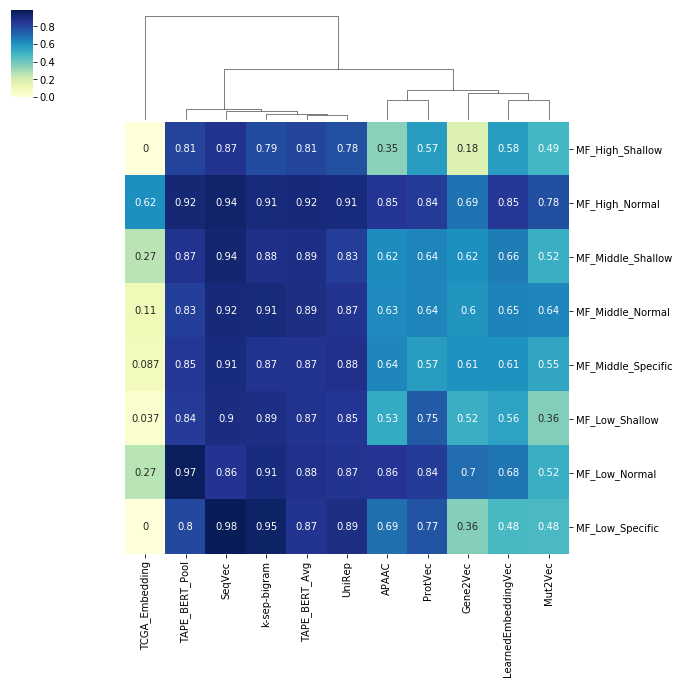

In [48]:
g = sns.clustermap(go_pred_tableF1_MF, annot=True, cmap="YlGnBu", row_cluster=False)
ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")

Text(182.65004139072846, 0.5, '')

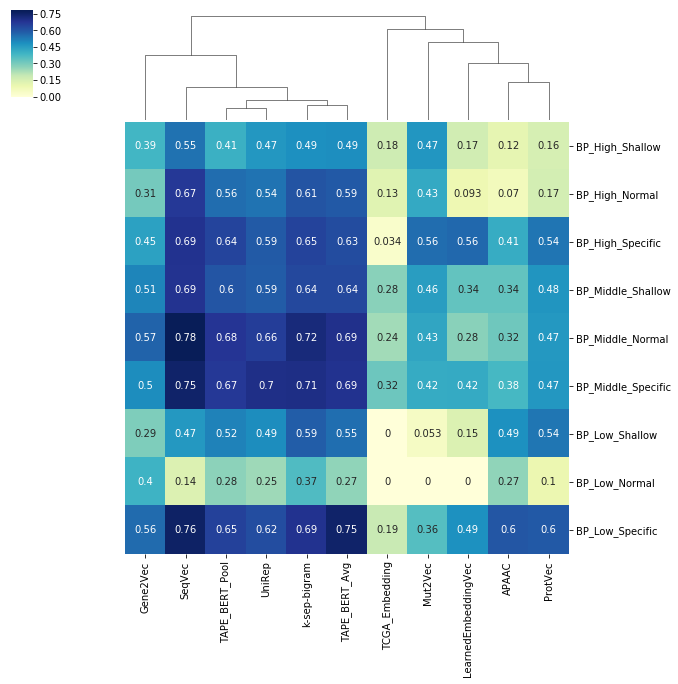

In [49]:
g = sns.clustermap(go_pred_tableF1_BP, annot=True, cmap="YlGnBu", row_cluster=False)
ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")

Text(182.65004139072846, 0.5, '')

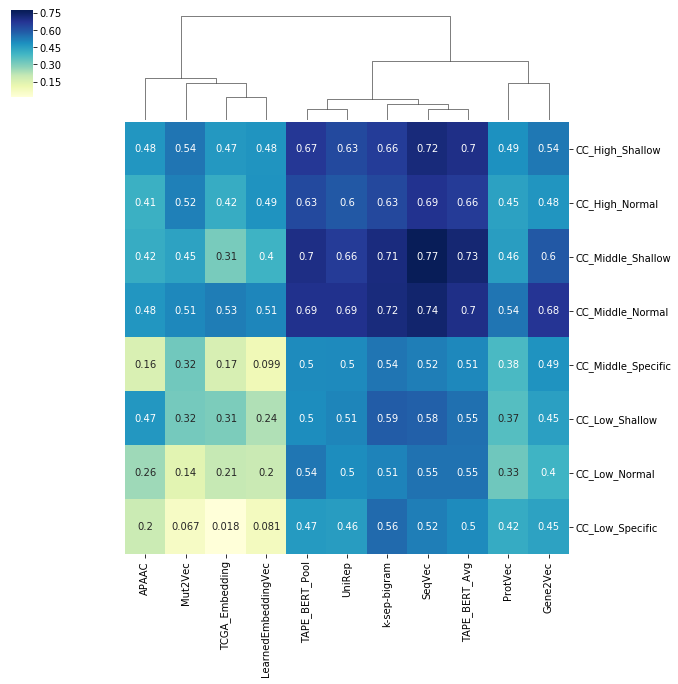

In [50]:
g = sns.clustermap(go_pred_tableF1_CC, annot=True, cmap="YlGnBu", row_cluster=False)
ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")